# Evaluación parcial 1.

Se procede a la importación de las librerias que serán a utilizadas posteriormente.

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Para la evaluación son entregados los siguientes valores
\begin{align}
\\
\end{align}

|f|Hz|50|63|80|100|125|160|200|250|315|400|500|630|800|1000|1250|1600|2000|2500|3150|4000|5000|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Lp| dB|96,8|99,0|89,7|93,8|95,9|80,2|78,8|67,9|76,5|72,6|79,8|80,6|76,0|73,8|80,2|78,6|83,0|82,8|73,3|73,7|58,1| 

Para facilitar la transcripción de estos datos, primeramente son escritos en excell y a traves de la siguiente función son pasados a Python, como lo es el nivel de presión sonora en ponderación (Z) ubicado en la segunda columna, con su respectiva frecuencia ubicada en la primera columna, y la correción que se le debe aplicar a cada frecuencia para ponderarlo en A en la tercera columna.

In [39]:
df= pd.read_excel('tabla_datos.xlsx',names=['freq', 'Lp','LpAc'])

In [40]:
print(df)

    freq    Lp  LpAc
0     50  96.8  30.2
1     63  99.0  26.2
2     80  89.7  22.5
3    100  93.8  19.1
4    125  95.9  16.1
5    160  80.2  13.4
6    200  78.8  10.9
7    250  67.9   8.6
8    315  76.5   6.6
9    400  72.6   4.8
10   500  79.8   3.2
11   630  80.6   1.9
12   800  76.6   0.8
13  1000  73.8   0.0
14  1250  80.2  -0.6
15  1600  78.6  -1.0
16  2000  83.0  -1.2
17  2500  82.8  -1.3
18  3150  73.3  -1.2
19  4000  73.7  -1.0
20  5000  58.1  -0.5


A traves de la siguiente función podemos definir los datos ingresados como diferentes listas.

In [85]:
freq=df.iloc[:, 0]
Lp=df.iloc[:, 1]
LpAc=df.iloc[:, 2]

## Ejercicio 1: Calculadora de decibeles
+ Desarrollar un código que realice la suma, la resta y el promedio de nivel de presión sonora.
+ Explique el desarrollo del código y sus ecuaciones involucradas.
+ Tomar como referencia $p_{0} = 2\times 10^{-5} \left(\frac{N}{m^2}\right)$.

Se realiza el codigo de la suma de niveles de presión, replicando el orden de las operaciones algebraicas que se presentan en la siguiente ecuación:$SUMA = \log{10}(\sum{n=1}^{n}(10^(\frac{Lp}{10})))$

In [87]:
#suma de Lp
Leq=0                                                         #Se define una variable de prealocado.
for i in range (0,len(Lp)):                                   #Se genera un ciclo for del mismo largo de la cantidades de niveles de presión.
    if i == 0:                                                #If para alocar el primer valor de Lp.
        Leq=Lp[i]                                             
    else:
        Leq=10*np.log10((10**(Leq/10))+(10**(Lp[i]/10)))      #Suma de niveles de presión.
print(Leq)    

103.24167834936334


Se realiza el codigo de la resta de niveles de presión, replicando el orden de las operaciones algebraicas que se presentan en la siguiente ecuación:

In [ ]:
#resta de Lp (en duda)
Leq=0                                                         #Se define una variable de prealocado.
for i in range (0,len(Lp)):                                   #Se genera un ciclo for del mismo largo de la cantidades de niveles de presión.
    if i == 0:                                                #If para alocar el primer valor de Lp.
        Leq=Lp[i]                                           
    elif Leq >= Lp[i]:
        Leq=10*np.log10((10**(Leq/10))-(10**(Lp[i]/10)))
    else:
        Leq=10*np.log10((10**(Lp[i]/10))-(10**(Leq/10)))
print(Leq)    

In [22]:
#promedio de dB
for i in range (0,len(Lp)):
    if i == 0:
        Lpsum=10**(Lp[i]/10)
    else:
        Lpsum=(Lpsum)+(10**(Lp[i]/10))
Leqprom=10*np.log10(Lpsum/len(Lp))
print(Leqprom)

95.77893782761569


In [42]:
#converison de tercio de octava a octava.
freq8=[63,125,250,500,1000,2000,4000]
sum=0
cont1=0
cont2=0
octava=np.zeros(7)
for i in range (0,len(Lp)):
    while cont1 < 3:
        sum=sum+Lp[i]
        cont1=cont1+1
        break
    if cont1 == 3:
        cont1=0
        octava[cont2]=sum/3
        cont2=cont2+1
        sum=0
        
print(freq8)
print(octava)

[63, 125, 250, 500, 1000, 2000, 4000]
[95.16666667 89.96666667 74.4        77.66666667 76.86666667 81.46666667
 68.36666667]


In [57]:
#converison de octavas a tercio de octava.
H=np.zeros(L)
cont=0
for i in range (0,len(freq)):
    if i%3==0 or i==0:
        H[i]=octava[cont]
        H[i+1]=octava[cont]
        H[i+2]=octava[cont]
        cont=cont+1
print(H)

[95.16666667 95.16666667 95.16666667 89.96666667 89.96666667 89.96666667
 74.4        74.4        74.4        77.66666667 77.66666667 77.66666667
 76.86666667 76.86666667 76.86666667 81.46666667 81.46666667 81.46666667
 68.36666667 68.36666667 68.36666667]


Text(0, 0.5, 'Amplitud')

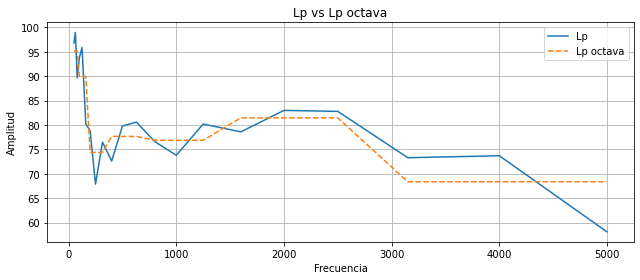

In [70]:
fig,ax = plt.subplots(figsize=(9,4), tight_layout=True)
ax.plot(freq,Lp,linestyle = '-',label = 'Lp')
ax.plot(freq,H,linestyle = '--',label= 'Lp octava')
plt.grid(True)
plt.legend()
ax.set_title('Lp vs Lp octava')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Amplitud')

[66.6 72.8 67.2 74.7 79.8 66.8 67.9 59.3 69.9 67.8 76.6 78.7 75.8 73.8
 80.8 79.6 84.2 84.1 74.5 74.7 58.6]


Text(0, 0.5, 'Amplitud')

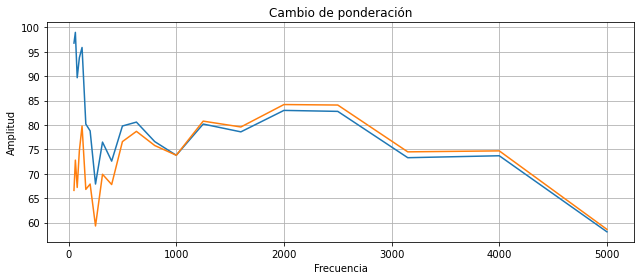

In [82]:
#Cambio de ponderacion Z-A
l=len(Lp)
LpA=np.zeros(l)
for i in range (0,l):
    LpA[i]=Lp[i]-LpAc[i]
print(LpA)

fig,ax = plt.subplots(figsize=(9,4), tight_layout=True)
ax.plot(freq,Lp)
ax.plot(freq,LpA)
plt.grid(True)
ax.set_title('Cambio de ponderación')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Amplitud')